## Importing Libraries

In [33]:
import pandas as pd

**Loading the dataset.**

In [34]:
df=pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')

**Showing the first five rows of the dataset.**

In [35]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Showing the shape of the dataset.**

In [36]:
df.shape

(24783, 7)

## Deleting Unwanted Columns

In [37]:
df.drop(columns=['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1, inplace=True)

In [38]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [39]:
df.shape

(24783, 2)

**Showing the information of the dataset.**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


**Showing the null values of the dataset.**

In [41]:
df.isnull().sum()

class    0
tweet    0
dtype: int64

**Showing the duplicate rows of the dataset.**

In [42]:
df.duplicated().sum()

0

# Data Cleaning Techniques

In [43]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [44]:
df['tweet'].iloc[700]

'#Dutch people who live outside of #NewYorkCity are all white trash.'

-------------

## A) Deleting Unwanted symbols and numeric data

In [45]:
df['Processed_tweet']=df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex=True)

In [46]:
df.head()

,class,tweet,Processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [47]:
df['Processed_tweet'].iloc[0]

'    RT  mayasolovely  As a woman you shouldn t complain about cleaning up your house   amp  as a man you should always take the trash out   '

In [48]:
df['Processed_tweet'].iloc[700]

' Dutch people who live outside of  NewYorkCity are all white trash '

-----------

## B) Removing Spaces and Handling unwated Spaces

In [49]:
df['Processed_tweet_2']=df['Processed_tweet'].str.replace(r'[\s]+', ' ', regex=True)

In [50]:
df.head()

,class,tweet,Processed_tweet,Processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [51]:
df['Processed_tweet_2'].iloc[0]

' RT mayasolovely As a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out '

In [52]:
df['Processed_tweet_2'].iloc[700]

' Dutch people who live outside of NewYorkCity are all white trash '

------------

## C) Deleteing Unwanted Columns

In [53]:
df.drop(columns=['tweet', 'Processed_tweet'],axis=1,inplace=True)

In [54]:
df.head()

,class,Processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


---------

# NLP 

**We are using Spacy here.**

In [55]:
import spacy

#### We are loading our english model here.

In [56]:
nlp=spacy.load('en_core_web_sm')

-------------------

## i) Lemmatization

In [59]:
def lemmatization(text):
    
    # We are passing every single tweet into this nlp model
    doc=nlp(text)
    
    lemmalist=[word.lemma_ for word in doc]
    
    return ' '.join(lemmalist)

In [60]:
df['lemma_tweet']=df['Processed_tweet_2'].apply(lemmatization)

In [61]:
df.head()

,class,Processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [63]:
df['Processed_tweet_2'][67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [64]:
df['lemma_tweet'][67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

**As you can see before lemmatization the word is dishes and after that it converts into dish.**

-----------

## ii) Removing the Stopwords

In [65]:
def remove_stopwords(text):
    doc=nlp(text)
    
    no_stopwords_list=[word.text for word in doc if not word.is_stop]
    
    return ' '.join(no_stopwords_list)

In [66]:
df['final_tweet']=df['lemma_tweet'].apply(remove_stopwords)

In [67]:
df.head()

,class,Processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [68]:
df['Processed_tweet_2'][67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [69]:
df['final_tweet'][67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

**As you can see here we are successfully remove the stopwords like do,a,these,one etc.**

------------

## iii) One Hot Representation

In [71]:
from tensorflow.keras.preprocessing.text import one_hot

In [72]:
vocab_size=10000

one_hot_representation=[one_hot(words, vocab_size) for words in df['final_tweet']]

In [73]:
df['final_tweet'].iloc[0]

'   RT mayasolovely woman shouldn t complain clean house amp man trash'

In [74]:
one_hot_representation[0]

[895, 9110, 3700, 4636, 6755, 3265, 7228, 6597, 8056, 211, 6769]

----------------

## iv) Padding

In [75]:
for i in range(0,4):
    print(df['final_tweet'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny


In [79]:
for i in range(0,4):
    print(one_hot_representation[i])

[895, 9110, 3700, 4636, 6755, 3265, 7228, 6597, 8056, 211, 6769]
[895, 5393, 5255, 4547, 7751, 9689, 8302, 8991, 6107, 4547, 4755, 743, 8361]
[895, 811, 8005, 895, 3404, 2081, 582, 6339, 3529, 6680, 3253, 6477]
[895, 4188, 4607, 9436, 9844, 8520, 776, 4048, 8638]


- **As you can see the problem is there is different length is present on the final_tweet and one_hot_representation.**

- **By Solving this issue we have to fix the sentence length for each sentences.**

- **That's why we need to perform padding here.**

In [80]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### We are using padding here.

- **Which means suppose the word length is 11, so we have to complete it in 20.** 
- **So we have to use 0s to fill the space.**
- **It's upto you where you use these 0s, it will be before or after --> pre or post**

In [81]:
sentence_length=20

embedded_tweet=pad_sequences(one_hot_representation, padding= 'pre',maxlen=sentence_length)

#### As you can see that every particular instance is consisting of equal number of elements.

In [82]:
for i in range(0,4):
    print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0  895 9110 3700 4636 6755
 3265 7228 6597 8056  211 6769]
[   0    0    0    0    0    0    0  895 5393 5255 4547 7751 9689 8302
 8991 6107 4547 4755  743 8361]
[   0    0    0    0    0    0    0    0  895  811 8005  895 3404 2081
  582 6339 3529 6680 3253 6477]
[   0    0    0    0    0    0    0    0    0    0    0  895 4188 4607
 9436 9844 8520  776 4048 8638]


-----

### Converting columns into numpy array

In [83]:
import numpy as np

In [84]:
X=np.array(embedded_tweet)
Y=np.array(df['class'])

-----

## Target Column

In [85]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

### Balancing our dataset using SMOTE

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
smote=SMOTE(sampling_strategy='minority')

X,Y=smote.fit_resample(X,Y)

--------

## Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [91]:
print(X.shape, X_train.shape,X_test.shape)

(42543, 20) (34034, 20) (8509, 20)


--------

# LSTM Model

In [92]:
import tensorflow as tf
from tensorflow import keras

### a) Building the Model

In [95]:
dimention=50

model=keras.Sequential([
    
    # Embedding layer
    keras.layers.Embedding(vocab_size, dimention, input_length=sentence_length),
    
    # LSTM layers (stacked)
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    
    # Output layer
    keras.layers.Dense(3, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### b) Compiling the Model

In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### c) Fitting the Model

In [100]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7631 - loss: 0.5193
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9458 - loss: 0.1678
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9615 - loss: 0.1215
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9744 - loss: 0.0860
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9782 - loss: 0.0723
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9826 - loss: 0.0554
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9891 - loss: 0.0371
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9910 - loss: 0.0276
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9937 - loss: 0.0215
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9948 - loss: 0.0166


--------

### d) Model Evaluation

In [101]:
loss,accuracy=model.evaluate(X_test, Y_test)

print('Model Accuracy: ',accuracy)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9012 - loss: 0.5597
Model Accuracy:  0.8949347734451294


#### So our Testing accuracy is 89%, which is Good

--------

# Prediction

In [102]:
model.predict(X_test)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[6.6584768e-03, 9.9212343e-01, 1.2180414e-03],
       [2.2008808e-04, 9.9939489e-01, 3.8504886e-04],
       [9.9999046e-01, 4.6619252e-06, 4.9332484e-06],
       ...,
       [7.9449608e-05, 9.9965775e-01, 2.6273774e-04],
       [1.6272467e-03, 9.6136332e-04, 9.9741143e-01],
       [2.7435669e-04, 9.9939525e-01, 3.3033380e-04]], dtype=float32)

#### i) We are using softmax, so our output will be coming out like in probabilities.

#### ii) So we are using np.argmax here to get the highest probability class

In [103]:
pred=np.argmax(model.predict(X_test), axis=-1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [104]:
Y_test[:5]

array([1, 1, 0, 1, 2])

In [105]:
pred[:5]

array([1, 1, 0, 1, 2])

#### As you can see our model is performing good based on this results.

-------

## Confusion Matrix and Classification Report

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

In [107]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3812
           1       0.91      0.91      0.91      3807
           2       0.73      0.75      0.74       890

    accuracy                           0.89      8509
   macro avg       0.85      0.86      0.86      8509
weighted avg       0.90      0.89      0.90      8509



In [108]:
print(confusion_matrix(Y_test,pred))

[[3487  200  125]
 [ 230 3461  116]
 [  92  131  667]]


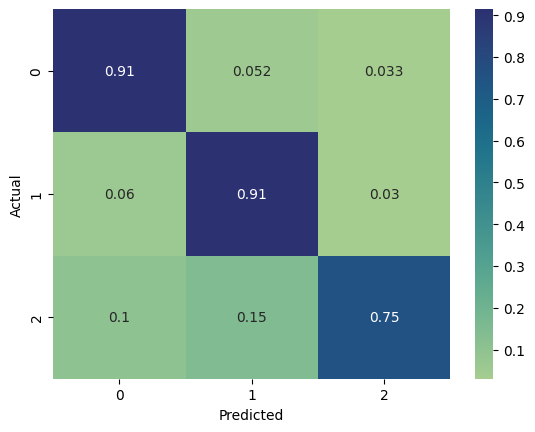

In [112]:
cf=confusion_matrix(Y_test,pred, normalize='true')

sn.heatmap(cf, annot=True, cmap='crest')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--------